Code Definitions

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Generating Synthetic Data

In [14]:
# Part (a): Generate synthetic data with some outliers
def generate_dataset(n_samples=100, n_outliers=5, random_state=42):
    X, y = make_classification(n_samples=n_samples, n_features=2,
                               n_redundant=0, n_informative=2,
                               random_state=random_state,
                               n_clusters_per_class=1, class_sep=1.5)

    # Add outliers by flipping labels for some points
    if n_outliers > 0:
        np.random.seed(random_state)
        outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)
        for idx in outlier_indices:
            y[idx] = 1 - y[idx]  # Flip the label

    return X, y, outlier_indices

In [15]:
# Function to plot decision boundaries
def plot_decision_boundary(X, y, models, model_names, title):
    plt.figure(figsize=(16, 6))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    for idx, (model, name) in enumerate(zip(models, model_names)):
        plt.subplot(1, len(models), idx + 1)
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', label = "Data Points")

        if hasattr(model, 'support_vectors_'):
            plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                        s=100, facecolors='none', edgecolors='red', label='Support Vectors')

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title(f'{name}')
        plt.legend()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [16]:
# Function to show outliers
def plot_outliers(X, y, outlier_indices):
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', label='Points')
    plt.scatter(X[outlier_indices, 0], X[outlier_indices, 1],
                s=100, facecolors='none', edgecolors='red', label='Outliers')
    plt.title('Original Dataset with Outliers Highlighted')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

In [17]:
# Part (c, d, e): Analysis Function
def analyze_models(models, model_names, X_test, y_test):
    print("Model Performance on Test Set:\n")
    for model, name in zip(models, model_names):
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        print(f"{name}: Accuracy = {acc:.2f}")
        if hasattr(model, 'support_vectors_'):
            print(f"{name}: Number of Support Vectors = {len(model.support_vectors_)}")
    print("\nSupport vectors are points that lie on the margin or within the margin (for soft margin).\n")

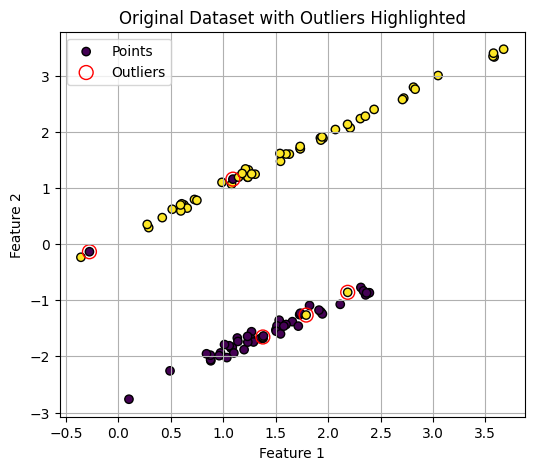

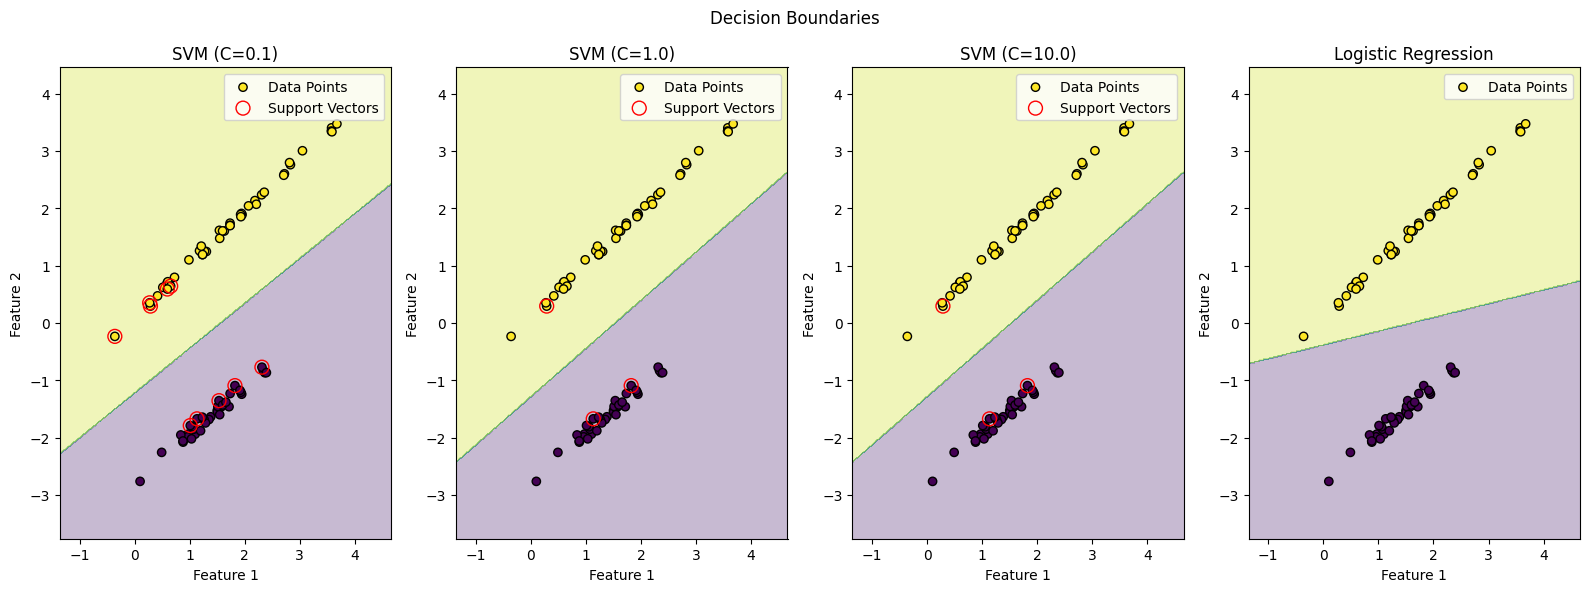

Model Performance on Test Set:

SVM (C=0.1): Accuracy = 0.75
SVM (C=0.1): Number of Support Vectors = 10
SVM (C=1.0): Accuracy = 0.75
SVM (C=1.0): Number of Support Vectors = 3
SVM (C=10.0): Accuracy = 0.75
SVM (C=10.0): Number of Support Vectors = 3
Logistic Regression: Accuracy = 0.75

Support vectors are points that lie on the margin or within the margin (for soft margin).


=== Performance with 10 Outliers ===


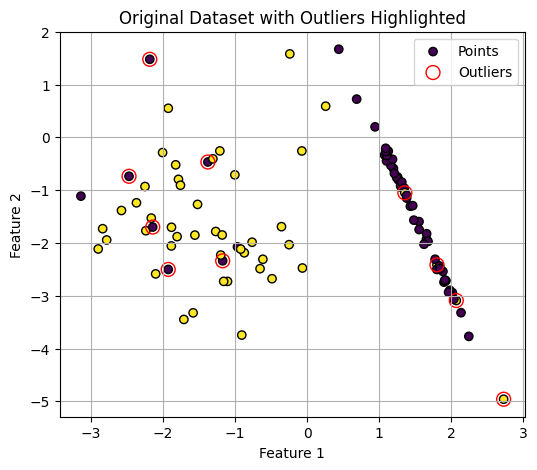

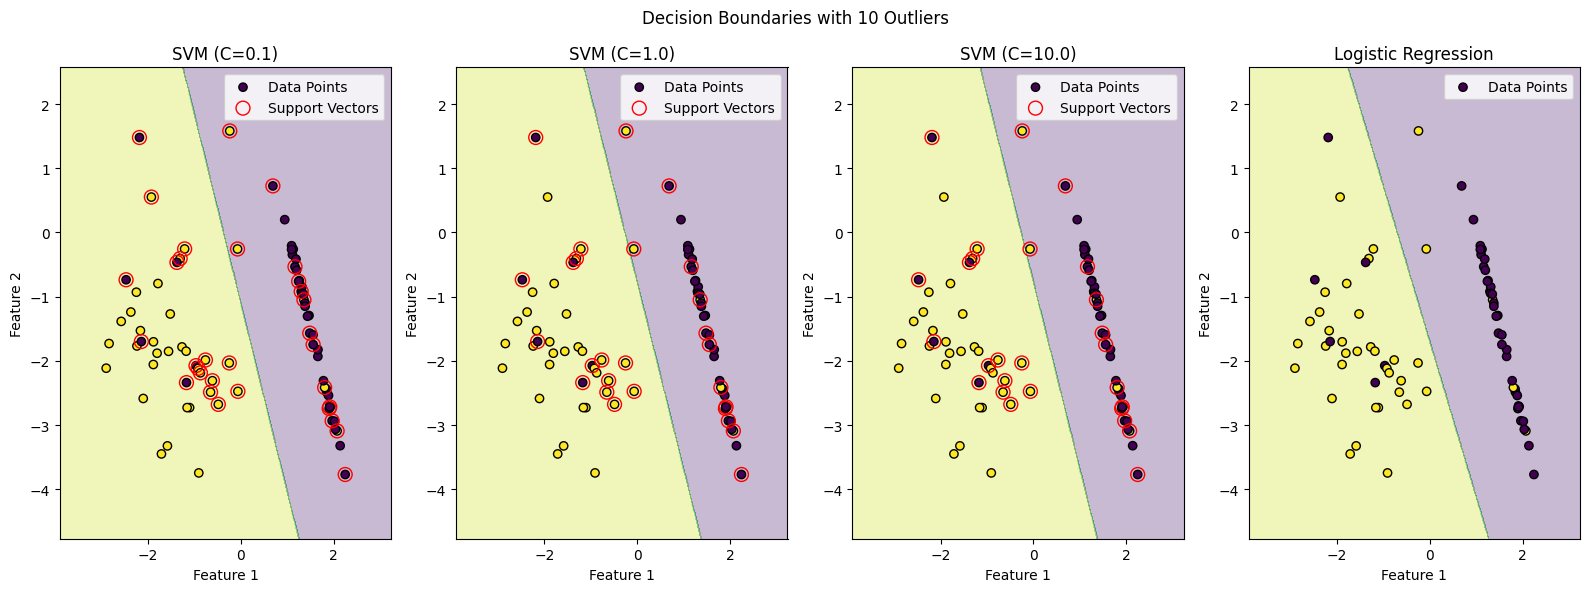

Model Performance on Test Set:

SVM (C=0.1): Accuracy = 0.80
SVM (C=0.1): Number of Support Vectors = 32
SVM (C=1.0): Accuracy = 0.80
SVM (C=1.0): Number of Support Vectors = 27
SVM (C=10.0): Accuracy = 0.80
SVM (C=10.0): Number of Support Vectors = 27
Logistic Regression: Accuracy = 0.80

Support vectors are points that lie on the margin or within the margin (for soft margin).


=== Performance with 15 Outliers ===


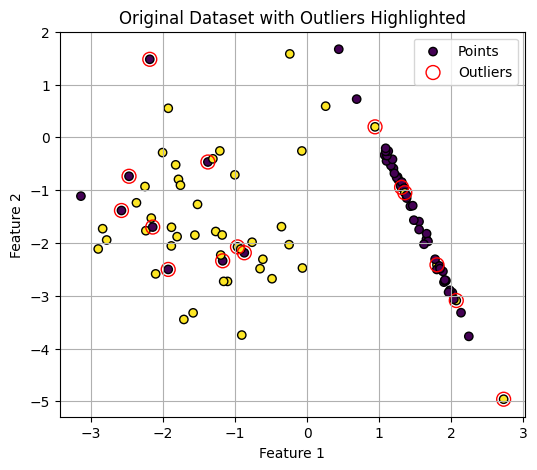

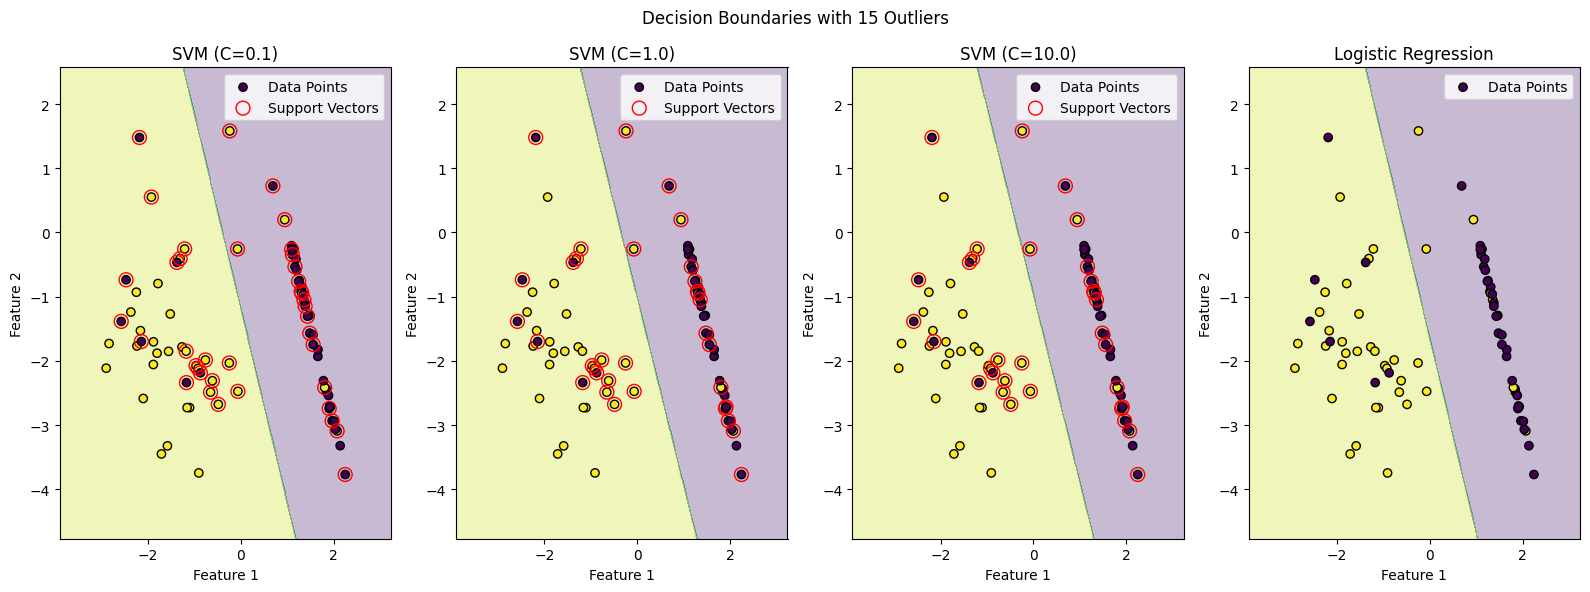

Model Performance on Test Set:

SVM (C=0.1): Accuracy = 0.80
SVM (C=0.1): Number of Support Vectors = 39
SVM (C=1.0): Accuracy = 0.80
SVM (C=1.0): Number of Support Vectors = 34
SVM (C=10.0): Accuracy = 0.80
SVM (C=10.0): Number of Support Vectors = 33
Logistic Regression: Accuracy = 0.80

Support vectors are points that lie on the margin or within the margin (for soft margin).


=== Performance with 25 Outliers ===


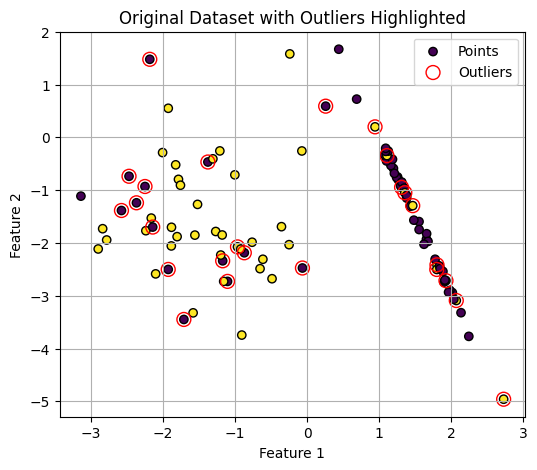

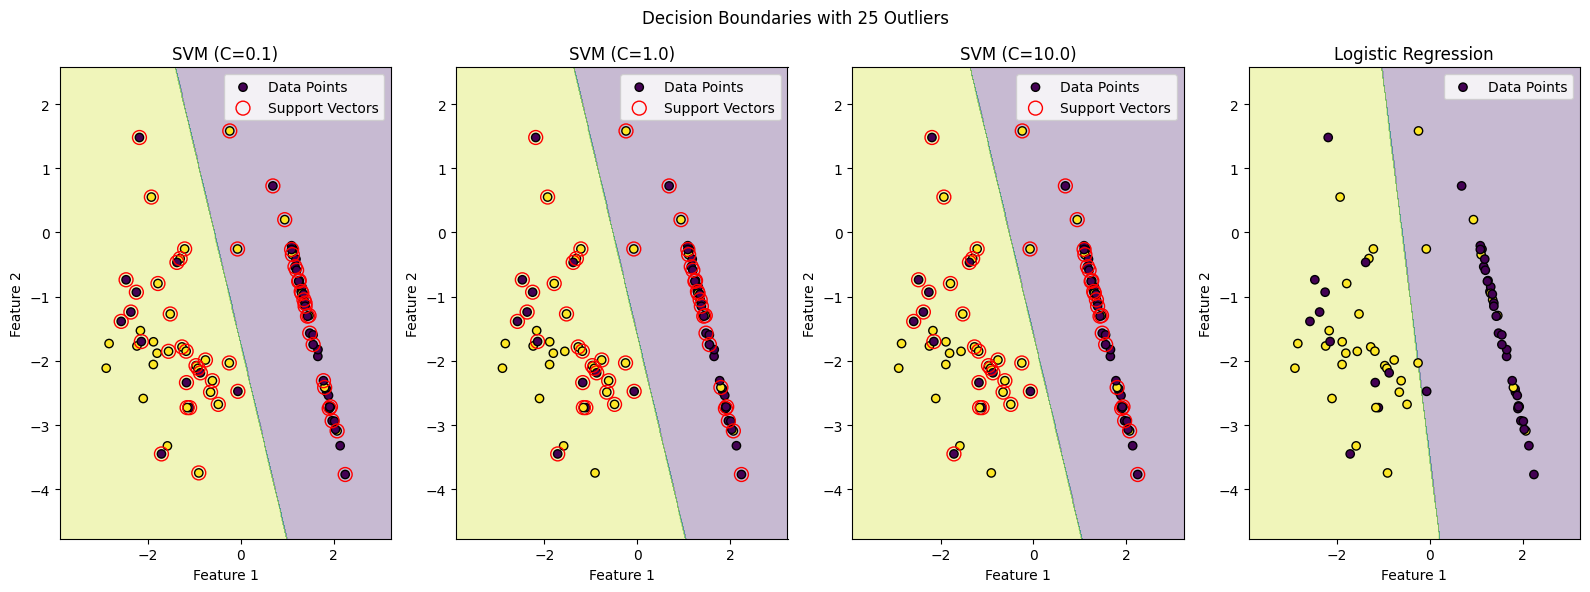

Model Performance on Test Set:

SVM (C=0.1): Accuracy = 0.80
SVM (C=0.1): Number of Support Vectors = 55
SVM (C=1.0): Accuracy = 0.80
SVM (C=1.0): Number of Support Vectors = 51
SVM (C=10.0): Accuracy = 0.80
SVM (C=10.0): Number of Support Vectors = 51
Logistic Regression: Accuracy = 0.80

Support vectors are points that lie on the margin or within the margin (for soft margin).



In [18]:
if __name__ == "__main__":
    # Part (a): Generate the dataset
    X, y, outlier_indices = generate_dataset(n_samples=100, n_outliers=5)
    plot_outliers(X, y, outlier_indices)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Part (b): Implement SVM with different C values and logistic regression
    c_values = [0.1, 1.0, 10.0]
    svm_models = []
    svm_model_names = []
    for c in c_values:
        svm = SVC(kernel='linear', C=c)
        svm.fit(X_train, y_train)
        svm_models.append(svm)
        svm_model_names.append(f"SVM (C={c})")

    logreg = LogisticRegression(C=1.0, solver='liblinear')
    logreg.fit(X_train, y_train)

    models = svm_models + [logreg]
    model_names = svm_model_names + ["Logistic Regression"]

    # Part (c): Compare decision boundaries
    plot_decision_boundary(X_train, y_train, models, model_names, title="Decision Boundaries")

    # Part (d): Analyze support vectors and performance
    analyze_models(models, model_names, X_test, y_test)

    # Part (e): Increase outliers and observe performance
    for n_outliers in [10, 15, 25]:
        print(f"\n=== Performance with {n_outliers} Outliers ===")
        X_new, y_new, outlier_indices_new = generate_dataset(n_samples=100, n_outliers=n_outliers, random_state=99)
        X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

        models_new = []
        for c in c_values:
            svm = SVC(kernel='linear', C=c)
            svm.fit(X_train_new, y_train_new)
            models_new.append(svm)

        logreg_new = LogisticRegression(C=1.0, solver='liblinear')
        logreg_new.fit(X_train_new, y_train_new)

        all_models_new = models_new + [logreg_new]
        model_names_new = svm_model_names + ["Logistic Regression"]

        plot_outliers(X_new, y_new, outlier_indices_new)
        plot_decision_boundary(X_train_new, y_train_new, all_models_new, model_names_new,
                               title=f"Decision Boundaries with {n_outliers} Outliers")
        analyze_models(all_models_new, model_names_new, X_test_new, y_test_new)


In [19]:
  # Sample accuracy results (replace with actual data if available)
outlier_counts = [0, 5, 10, 15, 20, 25]
accuracy_results = {
    'SVM (C=0.1)': [0.95, 0.90, 0.90, 0.80, 0.90, 0.60],
    'SVM (C=1.0)': [1.00, 0.90, 0.90, 0.80, 0.90, 0.65],
    'SVM (C=10.0)': [1.00, 0.90, 0.90, 0.80, 0.90, 0.65],
    'Logistic Regression (C=1.0)': [0.95, 0.85, 0.90, 0.80, 0.90, 0.60]
}

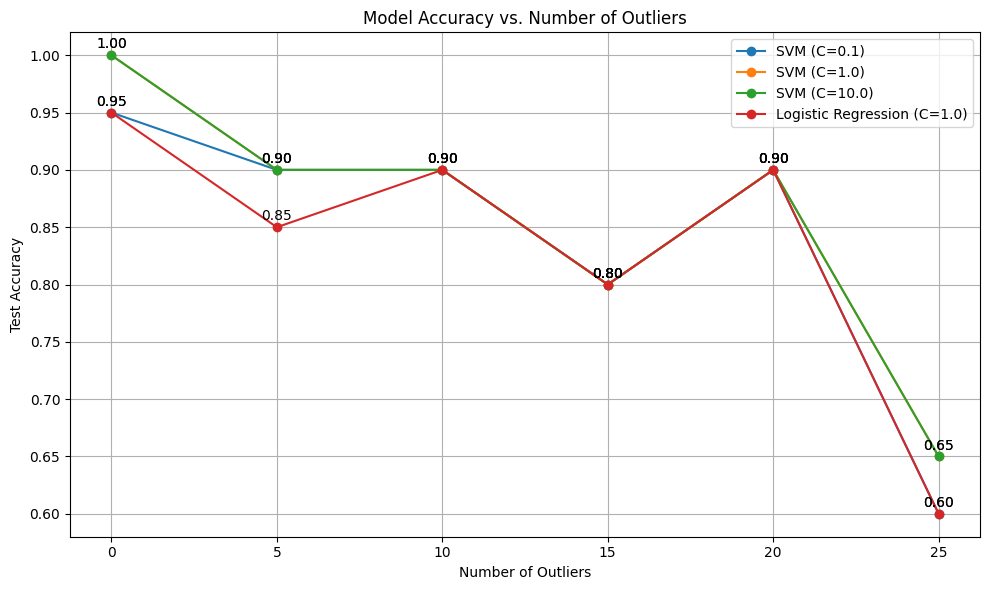


--- Accuracy Results Summary ---
Model                          | Accuracy with Outliers
----------------------------------------------------------------------
SVM (C=0.1)                    | 0:0.950, 5:0.900, 10:0.900, 15:0.800, 20:0.900, 25:0.600
SVM (C=1.0)                    | 0:1.000, 5:0.900, 10:0.900, 15:0.800, 20:0.900, 25:0.650
SVM (C=10.0)                   | 0:1.000, 5:0.900, 10:0.900, 15:0.800, 20:0.900, 25:0.650
Logistic Regression (C=1.0)    | 0:0.950, 5:0.850, 10:0.900, 15:0.800, 20:0.900, 25:0.600


In [20]:
plt.figure(figsize=(10, 6))
for model, accuracies in accuracy_results.items():
    plt.plot(outlier_counts, accuracies, marker='o', label=model)
    for x, y in zip(outlier_counts, accuracies):
        plt.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Model Accuracy vs. Number of Outliers')
plt.xlabel('Number of Outliers')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print formatted summary below the plot
print("\n--- Accuracy Results Summary ---")
print(f"{'Model':<30} | Accuracy with Outliers")
print("-" * 70)
for model, accs in accuracy_results.items():
    acc_str = ", ".join([f"{o}:{a:.3f}" for o, a in zip(outlier_counts, accs)])
    print(f"{model:<30} | {acc_str}")